In [1]:
import numpy as np
import cv2
import sys
import tiffcapture as tc
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as ndi
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import feature
from skimage.exposure import equalize_hist
from skimage.feature import canny
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops



In [2]:
sys.path.insert(0, '/Users/shrilakshmisbonageri/Desktop/UW/DIRECT/capstone/musical-robot/musicalrobot')

In [3]:
frames = io.imread('../doc/ChCl_CA_DES_96_5_17_19.tiff')
test_frames = io.imread('../doc/TestVideo.tiff')

In [4]:
len(frames)

3077

In [5]:
# test_frames = []
# test_tiff = tc.opentiff('../doc/TestVideo.tiff')
# for img in test_tiff:
#     test_frames.append(img)

In [6]:
image = test_frames[100]

In [7]:
gaus = gaussian(image,sigma=0.5)
sob = sobel(gaus)
edges = sobel(sob)>0.00015

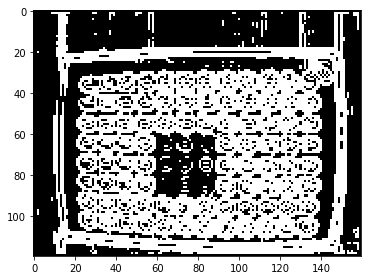

In [8]:
io.imshow(edges)

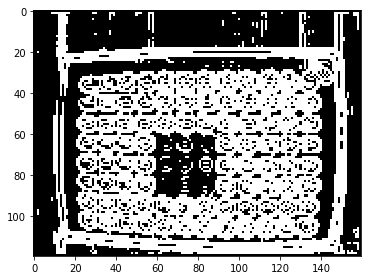

In [9]:
io.imshow(edges)

In [10]:
img1 = test_frames[400][20:113,15:145]
sharp_img1 = equalize_hist(img1, nbins=256, mask=None)

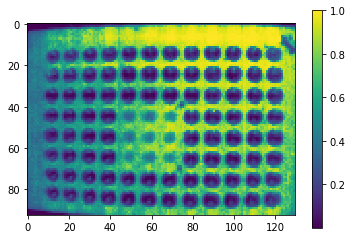

In [11]:
plt.imshow(sharp_img1)
plt.colorbar()

In [12]:
# gaus = gaussian(sharp_img1, sigma=0.5)
edges1 = feature.canny(gaus)>0.5

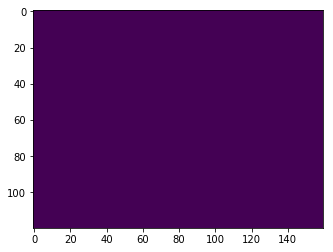

In [13]:
plt.imshow(edges1)

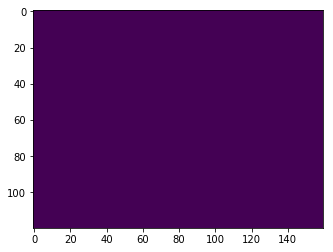

In [14]:
filled_wells = binary_fill_holes(edges1)
labeled_wells = label(filled_wells)
plt.imshow(labeled_wells)

### Working on a frame from the latest video

#### Using Contrast Limited Adaptive Histogram Equalization

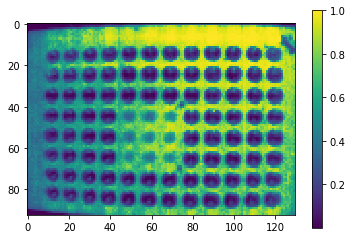

In [15]:
from skimage.exposure import equalize_adapthist
sharp_img11 = equalize_adapthist(img1,nbins=1000)
plt.imshow(sharp_img1)
plt.colorbar()

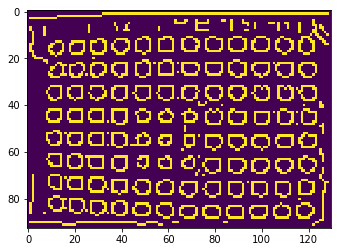

In [16]:
edges11 = feature.canny(sharp_img11)
plt.imshow(edges11)

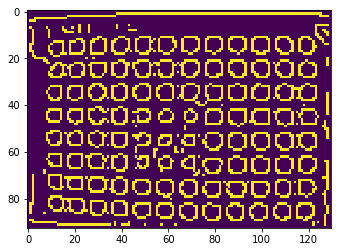

In [17]:
edges1 = feature.canny(sharp_img1)
plt.imshow(edges1)

(82, 118)

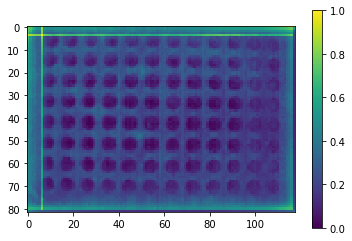

In [18]:
from skimage.exposure import equalize_adapthist
img2 = frames[200][16:98,20:138]
sharp_img2 = equalize_adapthist(img2,nbins=1000)
plt.imshow(sharp_img2)
plt.colorbar()
img2.shape

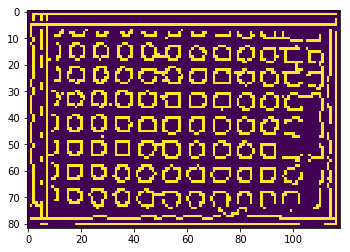

In [19]:
edges2 = feature.canny(sharp_img2)
plt.imshow(edges2)

### Rescaling contrast

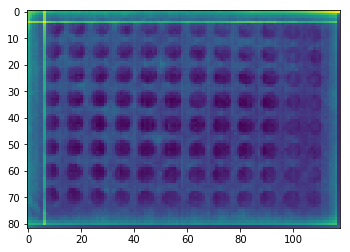

In [20]:
from skimage.exposure import rescale_intensity
rescale = rescale_intensity(sharp_img2, in_range='image', out_range='dtype')
plt.imshow(rescale)

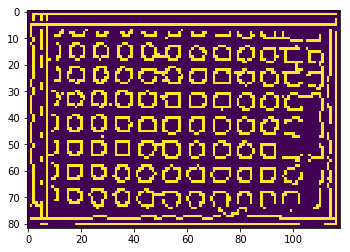

In [21]:
edges_rescale = feature.canny(rescale)
plt.imshow(edges_rescale)

### Trying ORB on equalized histogram (increased contrast) images

In [22]:
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)

In [23]:
descriptor_extractor = ORB(n_keypoints=96)

In [24]:
descriptor_extractor.detect_and_extract(sharp_img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(sharp_img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

In [25]:
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)

Text(0.5, 1.0, 'Matching features')

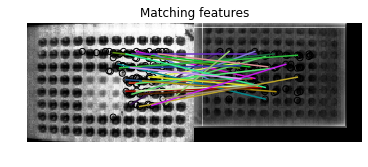

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plot_matches(ax, sharp_img1, sharp_img2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Matching features")



### Histogram equalization and Pixel Averaging

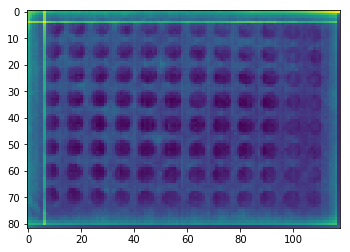

In [27]:
plt.imshow(sharp_img2)

In [28]:
sharp_img2

array([[0.7930801 , 0.75860371, 0.73274641, ..., 0.95684295, 0.98270024,
        1.        ],
       [0.7672228 , 0.71550822, 0.66379363, ..., 0.73274641, 0.75860371,
        0.52952041],
       [0.74998461, 0.67241273, 0.5430647 , ..., 0.61201748, 0.62925568,
        0.32198486],
       ...,
       [0.57754109, 0.53444561, 0.49996922, ..., 0.61201748, 0.64649387,
        0.22994521],
       [0.65511297, 0.63787478, 0.62925568, ..., 0.68103183, 0.69827002,
        0.26516038],
       [0.44062058, 0.39918734, 0.36101705, ..., 0.29489626, 0.3118882 ,
        0.34359416]])

In [29]:
rows = sharp_img2.shape[0]
columns = sharp_img2.shape[1]

In [30]:
column_sum = []
for i in range(0,columns):
    column_sum.append(sum(sharp_img2[:,i]))
    

In [31]:
len(column_sum)

118

In [56]:
from scipy.signal import find_peaks

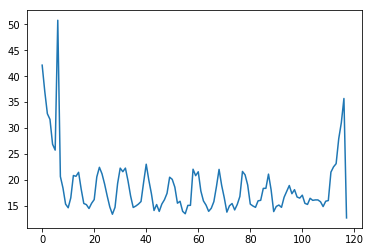

In [32]:
plt.plot(np.arange(118),column_sum)

In [57]:
find_peaks(column_sum)

(array([  6,  12,  14,  22,  30,  32,  40,  44,  49,  53,  58,  60,  68,
         73,  77,  87,  91,  95,  97, 100, 103, 105, 116]), {})

In [33]:
row_sum = []
for j in range(0,rows):
    row_sum.append(sum(sharp_img2[j,:]))

In [34]:
len(row_sum)

82

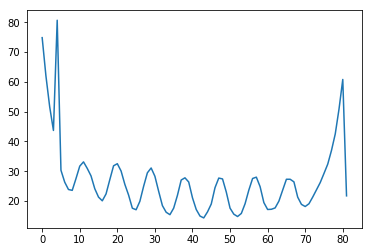

In [35]:
plt.plot(np.arange(82),row_sum)

### Median filter

In [36]:
from skimage.filters import median

In [37]:
median_img = median(sharp_img2)

/Users/shrilakshmisbonageri/miniconda3/envs/image/lib/python3.6/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


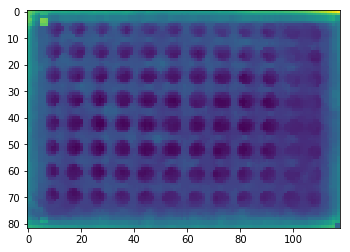

In [38]:
plt.imshow(median_img)

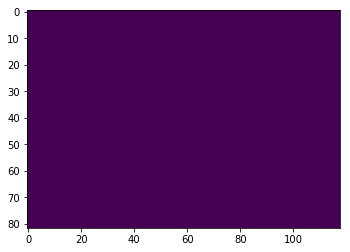

In [39]:
plt.imshow(feature.canny(median_img))

### Pixel Averaging

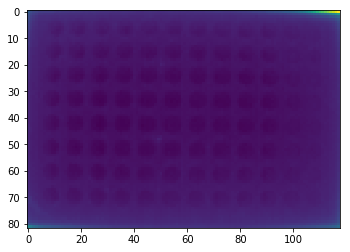

In [40]:
plt.imshow(img2)

In [41]:
rows_og = img2.shape[0]
columns_og = img2.shape[1]

In [42]:
column_sum_og = []
for i in range(0,columns_og):
    column_sum_og.append(sum(img2[:,i]))

In [43]:
row_sum_og = []
for j in range(0,rows_og):
    row_sum_og.append(sum(img2[j,:]))

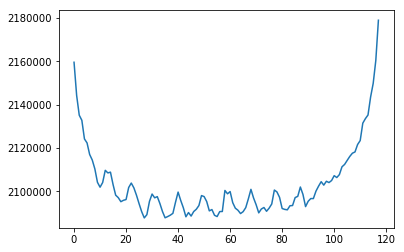

In [44]:
plt.plot(np.arange(columns_og),column_sum_og)

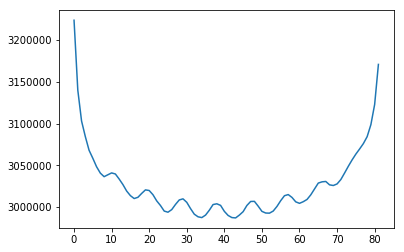

In [45]:
plt.plot(np.arange(rows_og),row_sum_og)

### Bilateral Filter

In [46]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)

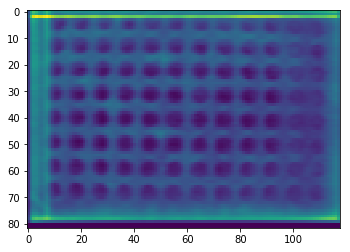

In [47]:
plt.imshow(denoise_bilateral(sharp_img2))

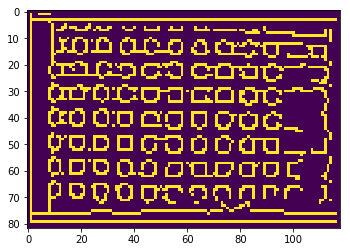

In [48]:
bilat_edges = feature.canny(denoise_bilateral(sharp_img2))
plt.imshow(bilat_edges)

### Equalizing the images

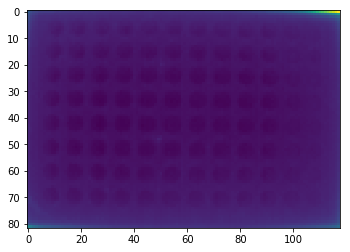

In [49]:
plt.imshow(img2)

In [50]:
for II in range(frames.shape[0]):
    frame = frames[II][16:98,20:138]
    img_eq = (frame - np.amin(frame))/(np.amax(frame)-np.amin(frame))
    if II == 0:
        img_ave = img_eq
    else:
        img_ave = img_ave + img_eq
img_ave = img_ave/frames.shape[0]
img_eq = (img_ave - np.amin(img_ave))/(np.amax(img_ave)-np.amin(img_ave))

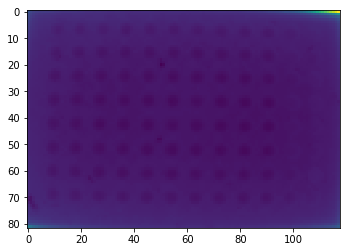

In [51]:
plt.imshow(img_eq)

In [52]:
img_out = (img_eq - np.amin(img_eq))*(1/(np.amax(img_eq) - np.amin(img_eq)))

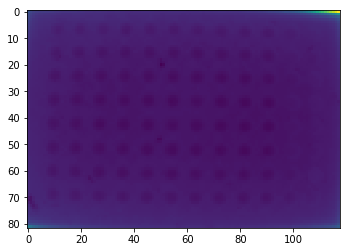

In [53]:
plt.imshow(img_out)